# Challenge Set 2

Topic: Pandas Data Manipulation and Plotting <br>
Date: 10/10/2016 <br>
Name: Travis James <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser
%matplotlib inline

In [2]:
movie_df = pd.read_csv('https://raw.githubusercontent.com/travishjames/sf16_ds4/master/challenges/02-pandas/2013_movies.csv?token=AUIhtmYeebYMazrEXWFR37pqXbKbmh1pks5X-wV3wA%3D%3D')

In [3]:
movie_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [4]:
movie_df[['Budget','DomesticTotalGross','Runtime']] = movie_df[['Budget','DomesticTotalGross','Runtime']].apply(pd.to_numeric)

In [5]:
movie_df[['ReleaseDate']] = movie_df[['ReleaseDate']].apply(pd.to_datetime)

**Challenge 2.1**

In [6]:
movie_df = movie_df.sort_values('ReleaseDate')

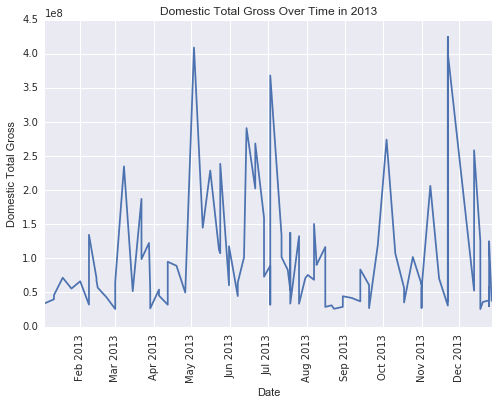

In [52]:
plt.plot(movie_df['ReleaseDate'], movie_df['DomesticTotalGross'])
plt.xlabel('Date')
plt.xticks(rotation = 'vertical')
plt.ylabel('Domestic Total Gross')
plt.title('Domestic Total Gross Over Time in 2013');

**Challenge 2.2**

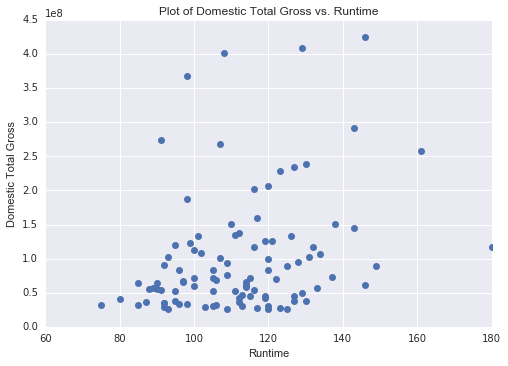

In [47]:
plt.plot(movie_df['Runtime'], movie_df['DomesticTotalGross'], 'o')
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross')
plt.title('Plot of Domestic Total Gross vs. Runtime');

**Challenge 2.3**

In [9]:
movie_df.groupby(['Rating'])[['DomesticTotalGross', 'Runtime']].mean()

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


**Challenge 2.4**

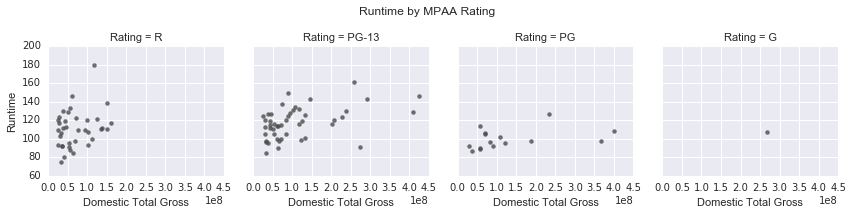

In [44]:
import seaborn as sns

grid_plot = sns.FacetGrid(movie_df, col='Rating')
grid_plot.map(sns.regplot, 'DomesticTotalGross', 'Runtime',color='.3', fit_reg=False)
grid_plot.set_xlabels('Domestic Total Gross')
plt.subplots_adjust(top=0.8)
grid_plot.fig.suptitle('Runtime by MPAA Rating');

**Challenge 2.5**

In [11]:
directors_df = movie_df.groupby(['Director'])[['DomesticTotalGross']].mean()
directors_df.sort_values('DomesticTotalGross', ascending = False)

#Francis Lawrence is the highest grossing director per film

,DomesticTotalGross
Director,
Francis Lawrence,424668047
Shane Black,409013994
Chris BuckJennifer Lee,400738009
Pierre CoffinChris Renaud,368061265
Zack Snyder,291045518
Alfonso Cuaron,274092705
Dan Scanlon,268492764
Peter Jackson,258366855
Justin Lin,238679850


**Challenge 2.6**

In [23]:
movie_df['month'] = movie_df['ReleaseDate'].dt.month

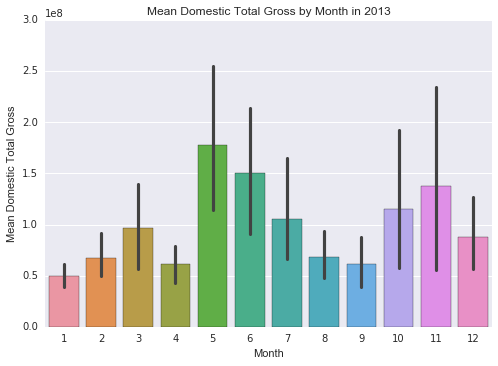

In [29]:
plot = sns.barplot(x="month", y="DomesticTotalGross", data=movie_df)
plot.set_title('Mean Domestic Total Gross by Month in 2013')
plot.set_ylabel('Mean Domestic Total Gross')
plot.set_xlabel('Month');